In [18]:
# version0.1 Baseline

In [9]:
# https://archive.ics.uci.edu/ml/datasets/Census+Income
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
from google.colab import files
uploaded = files.upload()


Saving adult.test to adult.test
Saving adult.data to adult.data


In [62]:
data = pd.read_csv('adult.data', header=None)
# data 분석
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']
data.columns = feature_names

test = pd.read_csv('adult.test', skiprows=1, header=None)
test.columns = feature_names
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [232]:
np.arange(10).dtype == np.object

False

In [235]:
# data 분석
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

train_data_origin = pd.read_csv('adult.data', header=None)
train_data_origin.columns = feature_names

def strip_column(x):
    return x.strip()

def strip_df(x):
    # apply에서 object로?
    if x[0] == np.object:
        return x.apply(strip_column)
    else:
        return x

train_data_origin = train_data_origin.apply(strip_df)
# train_data_origin['marital-status'] = train_data_origin['marital-status'].apply(lambda x: x.strip())


test_data = pd.read_csv('adult.test', header=None, skiprows=1)
test_data.columns = feature_names

In [199]:
train_data_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [200]:
train_data_origin.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [201]:
train_data_origin.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# EDA

In [237]:
# 생략.
train_data = train_data_origin.copy()


In [238]:
train_data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [239]:
# Married-civ-spouse

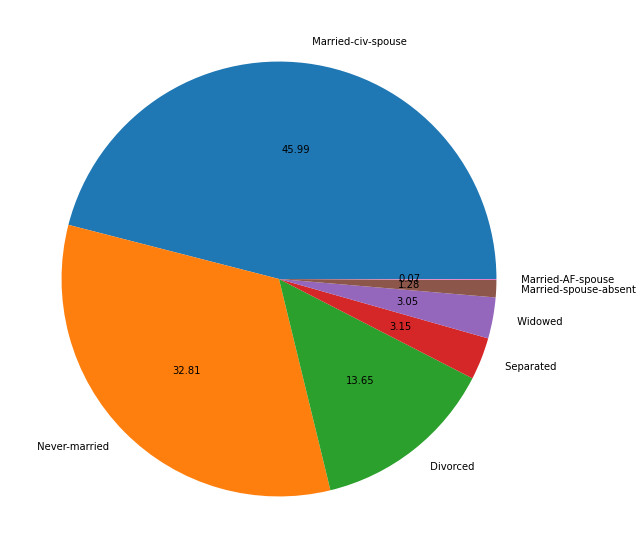

In [240]:
plt.figure(figsize=(10, 10))
plt.pie(
    train_data['marital-status'].value_counts(), 
    labels=train_data['marital-status'].value_counts().index,
    autopct="%.2f"
)
plt.show()

In [241]:
train_data['marital-status'][0]

' Never-married'

In [242]:
train_data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [243]:
label_encoder= LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_encoded

array([0, 0, 0, ..., 0, 0, 1])

In [253]:
train_data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

<BarContainer object of 4 artists>

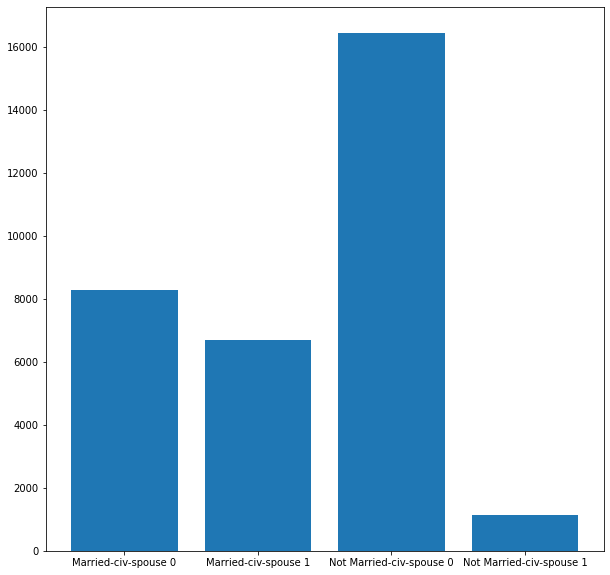

In [260]:
# marital-status
# marital-status y
# train_data['marital-status']
plt.figure(figsize=(10, 10))

cond1 = train_data['marital-status'] == ' Married-civ-spouse'
cond2 = train_data['income'] == ' <=50K'
cond3 = train_data['marital-status'] != ' Married-civ-spouse'
cond4 = train_data['income'] != ' <=50K'

X = ['Married-civ-spouse 0', 'Married-civ-spouse 1', 
     'Not Married-civ-spouse 0', 'Not Married-civ-spouse 1']
y = [train_data[cond1 & cond2].count()[0], train_data[cond1 & cond4].count()[0], 
     train_data[cond3 & cond2].count()[0], train_data[cond3 & cond4].count()[0]]
plt.bar(X, y)

# train_data[train_data['marital-status'] == 'Married-civ-spouse'] 

In [266]:
X_train.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


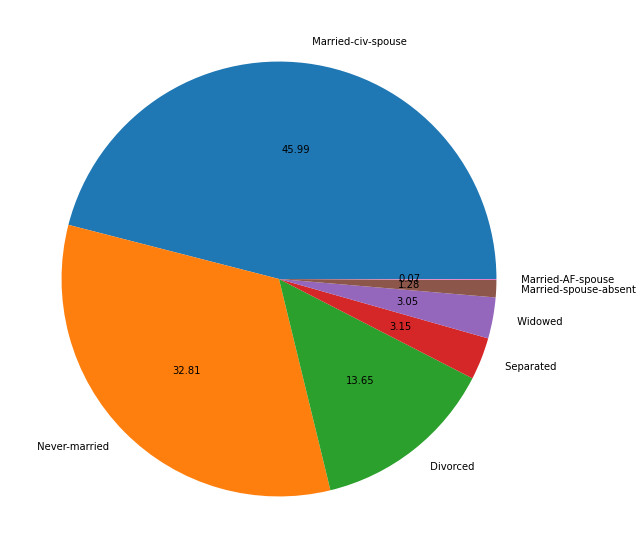

In [261]:
plt.figure(figsize=(10, 10))
plt.pie(
    train_data['marital-status'].value_counts(), 
    labels=train_data['marital-status'].value_counts().index,
    autopct="%.2f"
)
plt.show()

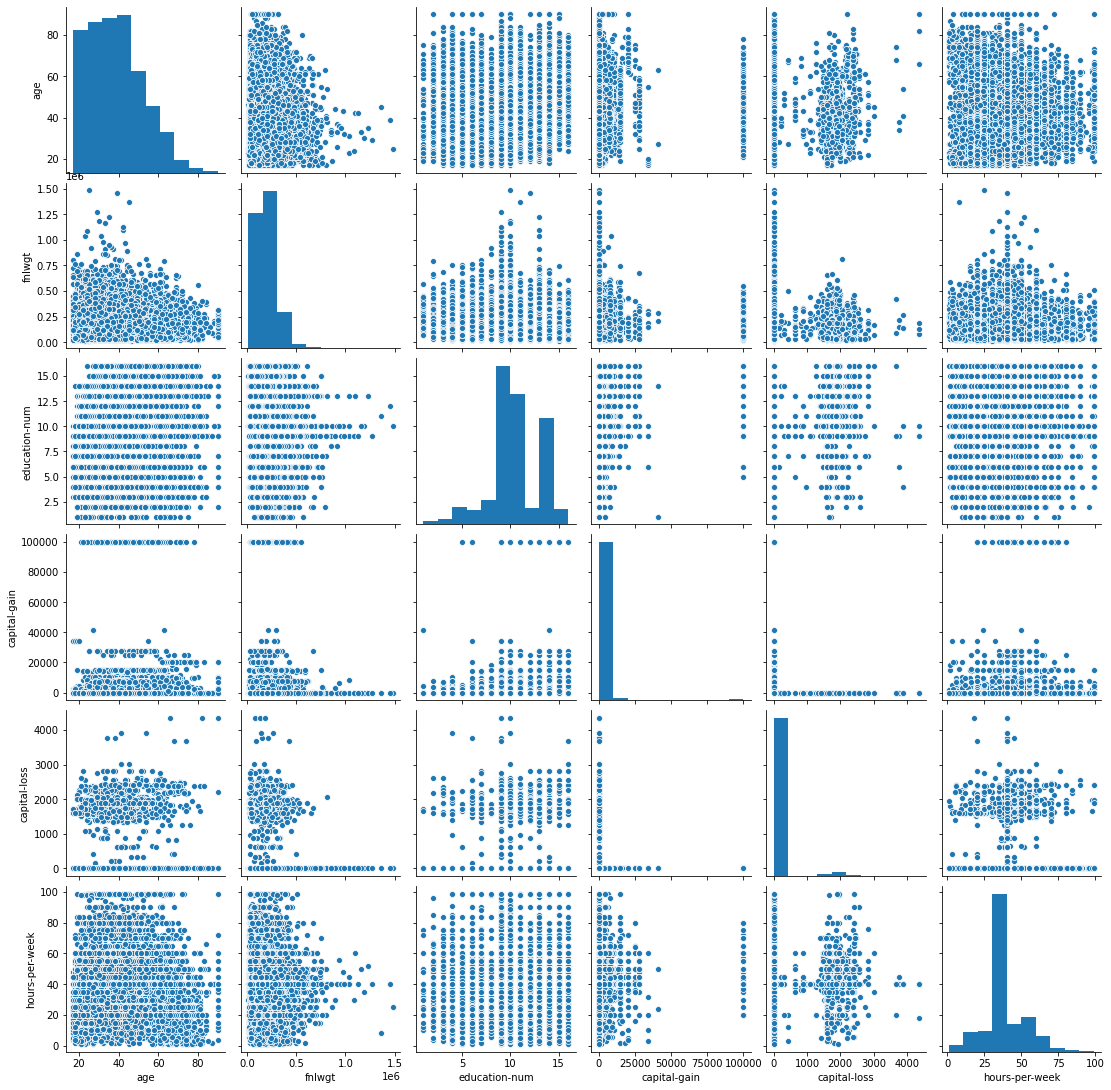

In [65]:
sns.pairplot(train_data)

In [110]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [32]:
for c in train_data.columns:
    print("{0}: {1}".format(c, len(train_data[c].unique())))

age: 73
workclass: 9
fnlwgt: 21648
education: 16
education-num: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
capital-gain: 119
capital-loss: 92
hours-per-week: 94
native-country: 42
income: 2


In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [66]:
class BinaryFeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.classes_ = None
        
    def fit(self, X, y=None):
        try:
            classes_ = np.unique(X)
            
            col_num = len(classes_)
            if col_num != 2:
                raise ValueError
            self.classes_ = classes_
        except:
            raise ValueError("col_num은 2여야 합니다.")
        return self
    
    def transform(self, X, y=None):
        return (X == self.classes_[1]).astype(int)
        

In [70]:
X_train = train_data.drop('income',axis=1)
y_train = train_data['income']

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
np.unique(y_train_encoded)

array([0, 1])

In [71]:
num_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cgr_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
bin_columns = ['sex']

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer()), # 임시로 달아놓음.
                         ('scaler', StandardScaler())
])

cgr_pipeline = Pipeline([
                         ('encoder', OneHotEncoder()),
])
bin_pipeline = Pipeline([
                         ('encoder', BinaryFeatureEncoder())
])

pipeline = ColumnTransformer([
                              # ('nothing', 'passthrough', num_columns),
                              ('num_pipeline', num_pipeline, num_columns),
                              ('cgr_pipeline', cgr_pipeline, cgr_columns),
                              ('bin_pipeline', bin_pipeline, bin_columns),
])


In [75]:
X_train_ready = pipeline.fit_transform(X_train).toarray()
X_train_ready.shape

(32561, 107)

In [146]:

cgr_feature_list = pipeline.named_transformers_['cgr_pipeline']['encoder'].get_feature_names()

In [180]:
column_list = num_columns.copy()
column_list.extend(list(cgr_feature_list))
# column_list[36]
column_list[33] # XGBOOST - feature_importance #1

'x2_ Married-civ-spouse'

array(['x0_ ?', 'x0_ Federal-gov', 'x0_ Local-gov', 'x0_ Never-worked',
       'x0_ Private', 'x0_ Self-emp-inc', 'x0_ Self-emp-not-inc',
       'x0_ State-gov', 'x0_ Without-pay', 'x1_ 10th', 'x1_ 11th',
       'x1_ 12th', 'x1_ 1st-4th', 'x1_ 5th-6th', 'x1_ 7th-8th', 'x1_ 9th',
       'x1_ Assoc-acdm', 'x1_ Assoc-voc', 'x1_ Bachelors',
       'x1_ Doctorate', 'x1_ HS-grad', 'x1_ Masters', 'x1_ Preschool',
       'x1_ Prof-school', 'x1_ Some-college', 'x2_ Divorced',
       'x2_ Married-AF-spouse', 'x2_ Married-civ-spouse',
       'x2_ Married-spouse-absent', 'x2_ Never-married', 'x2_ Separated',
       'x2_ Widowed', 'x3_ ?', 'x3_ Adm-clerical', 'x3_ Armed-Forces',
       'x3_ Craft-repair', 'x3_ Exec-managerial', 'x3_ Farming-fishing',
       'x3_ Handlers-cleaners', 'x3_ Machine-op-inspct',
       'x3_ Other-service', 'x3_ Priv-house-serv', 'x3_ Prof-specialty',
       'x3_ Protective-serv', 'x3_ Sales', 'x3_ Tech-support',
       'x3_ Transport-moving', 'x4_ Husband', 'x4_ Not-in-f

In [136]:
pipeline['cgr_pipeline']['encoder'].get_feature_names()

TypeError: ignored

In [76]:
X_train.shape

(32561, 14)

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
!pip install xgboost
import xgboost

In [101]:
# model selection
import tqdm
log_reg = LogisticRegression(solver='liblinear')
svm_clf = SVC(kernel='linear')
xgb = xgboost.sklearn.XGBClassifier(n_jobs=-1)
forest = RandomForestClassifier(max_depth=3, n_jobs=-1)

clf_list = [log_reg, svm_clf, xgb, forest]


In [109]:
score_list = []
for clf in tqdm.tqdm(clf_list):
    clf.fit(X_train_ready, y_train_encoded)
    
    cv_score = cross_val_score(clf, X_train_ready, y_train_encoded,cv=5, 
                               scoring='accuracy', n_jobs=-1, verbose=10).mean()
    score_list.append(
        (clf, cv_score)
    )


  0%|          | 0/4 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    4.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished

 25%|██▌       | 1/4 [00:05<00:17,  5.80s/it][Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  7.4min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.1min finished

 50%|█████     | 2/4 [14:37<08:51, 265.71s/it][Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapse

In [112]:
y_train.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [123]:
score_list

[(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False), 0.8520931205062942),
 (SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False), 0.8510182715272535),
 (XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.1, max_delta_step=0, max_depth=3,
                min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
                nthread=None, objective='binary:logistic', random_state=0,

In [265]:
np.sort(xgb.feature_importances_)
# np.argmax(xgb.feature_importances_)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00105189, 0.00111782, 0.00116384, 0.00139167,
       0.00146604, 0.00223126, 0.00230942, 0.00232815, 0.00257   ,
       0.00263601, 0.00291748, 0.00303707, 0.00354706, 0.00392

In [129]:
xgb.feature_importances_

array([0.03276454, 0.00291748, 0.08824739, 0.06363929, 0.02412738,
       0.02900841, 0.        , 0.01145716, 0.00942626, 0.        ,
       0.00105189, 0.00533674, 0.00928154, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00223126, 0.00232815,
       0.        , 0.00303707, 0.        , 0.        , 0.00974531,
       0.00111782, 0.00116384, 0.0103101 , 0.35029903, 0.        ,
       0.01145031, 0.        , 0.        , 0.00744724, 0.00354706,
       0.        , 0.        , 0.05312666, 0.01914366, 0.00999615,
       0.00854469, 0.03051051, 0.        , 0.03928619, 0.00865797,
       0.01557121, 0.0133513 , 0.00263601, 0.        , 0.01334385,
       0.00716579, 0.02827743, 0.00139167, 0.01254907, 0.00146604,
       0.        , 0.00257   , 0.        , 0.00578579, 0.00392846,
       0.00230942, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [90]:
log_reg.fit(X_train_ready, y_train_encoded)
y_pred = log_reg.predict(X_train_ready)

In [91]:
from sklearn.metrics import accuracy_score, f1_score

In [93]:
accuracy_score(y_pred, y_train_encoded)

0.8531679002487639

In [97]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_encoded, y_pred), recall_score(y_train_encoded, y_pred)

(0.7381693648816936, 0.6047697997704374)

In [94]:
f1_score(y_train_encoded, y_pred)

0.6648440238345601

In [100]:
from sklearn.model_selection import GridSearchCV

In [273]:
svm_clf = SVC()
param_grid = {
    'kernel': ['linear'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(svm_clf,param_grid=param_grid,scoring='accuracy', 
                           cv=10, n_jobs=-1, verbose=10)
grid_search.fit(X_train_ready, y_train_encoded)

KeyboardInterrupt: ignored

In [ ]:
svm_clf = SVC()
param_grid = [{
    'kernel': ['linear'],
    'C': [0.01, 0.1, 1, 10, 100],
    },{
    'kernel':['rbf'],
    'C':[0.1, 1, 10],
    'gamma':[0.1, 1, 10]
    }]
grid_search = GridSearchCV(svm_clf,param_grid=param_grid,scoring='accuracy', 
                           cv=5, n_jobs=-1, verbose=10)
grid_search.fit(X_train_ready, y_train_encoded)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 76.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 136.6min


In [271]:
# hyperopt라이브러리.
# Bayesian optimization algorithms 
# GridSearch는 우리가 임의의 파라미터를 주고 거기서, 찾는다.
# hyperort는 범위로서 파라미터 들을 전달하고, 그 범위에서 최적을 찾는다!

# https://github.com/hyperopt/hyperopt-sklearn

from hpsklearn import HyperoptEstimator,svc
from hyperopt import fmin, tpe, space_eval, hp

kernels = hp.choice('kernel', ['linear', 'sigmoid', 'rbf'])
gamma = hp.uniform('gamma', 0.01, 100)
C = hp.uniform('C', 0.01, 100)


estim = HyperoptEstimator(
                          classifier=svc('my_svc'),
                          preprocessing=[],
                          algo=tpe.suggest
                          )

estim.fit(X_train_ready, y_train_encoded)


100%|██████████| 1/1 [01:42<00:00, 102.96s/it, best loss: 0.2456625211116229]

100%|██████████| 1/1 [01:23<00:00, 83.91s/it, best loss: 0.2456625211116229]

100%|██████████| 1/1 [01:29<00:00, 89.85s/it, best loss: 0.14724397359127894]

100%|██████████| 1/1 [01:56<00:00, 116.69s/it, best loss: 0.1455550437586366]

100%|██████████| 1/1 [14:52<00:00, 892.27s/it, best loss: 0.1455550437586366]

100%|██████████| 1/1 [04:44<00:00, 284.99s/it, best loss: 0.1455550437586366]

100%|██████████| 1/1 [01:03<00:00, 63.56s/it, best loss: 0.1455550437586366]

  0%|          | 0/1 [03:53<?, ?it/s, best loss: ?]


KeyboardInterrupt: ignored

In [82]:
log_reg.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)